In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [53]:
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target


In [46]:
data.shape

(20640, 9)

In [47]:
print(data.describe())


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [48]:
print(data.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


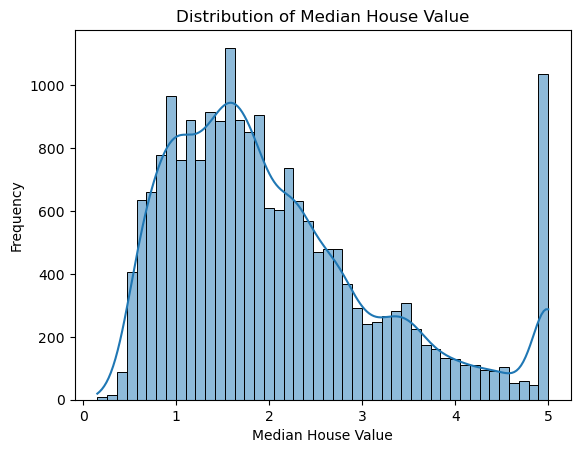

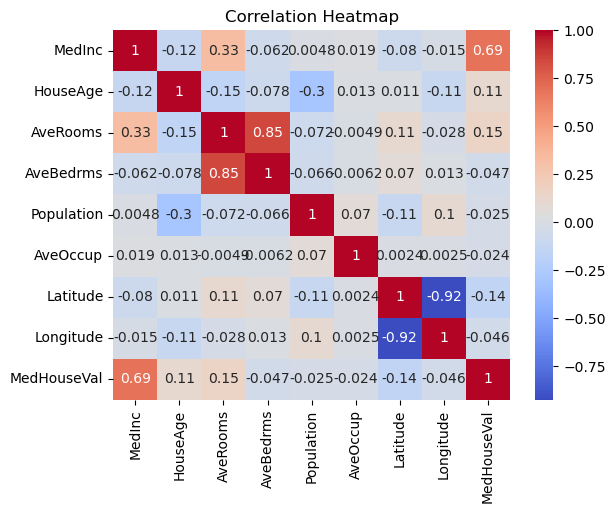

In [49]:
sns.histplot(data['MedHouseVal'], kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


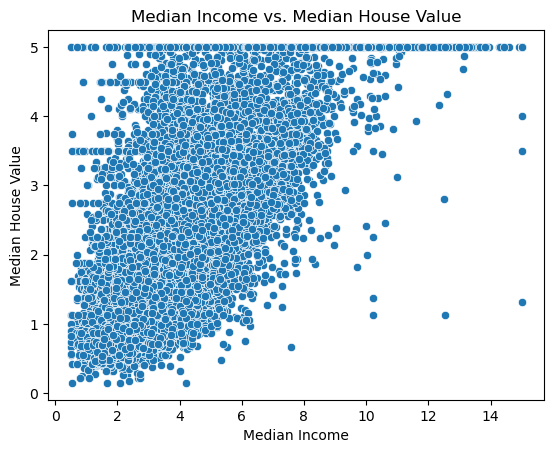

In [50]:
sns.scatterplot(x='MedInc', y='MedHouseVal', data=data)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


In [51]:
# Selecting features and target variable
X = data.drop(columns=['MedHouseVal'])
y = data['MedHouseVal']


In [58]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Initialize and train the SVR model
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)


In [ ]:
from sklearn.feature_selection import RFE
# Perform Recursive Feature Elimination
selector = RFE(estimator=svm_reg, n_features_to_select=5)  # Adjust the number of features to select
selector.fit(X_train, y_train)

In [ ]:
selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features)

In [ ]:
from sklearn.linear_model import LassoCV

# Create a Lasso regression model with cross-validation
lasso = LassoCV(alphas=[0.1, 0.01, 0.001], cv=5)  

# Fit the model
lasso.fit(X_train, y_train)

# Get the coefficients
coef = pd.Series(lasso.coef_, index=X.columns)

# Select features with non-zero coefficients
selected_features_lasso = coef[coef != 0].index
print("Selected Features (Lasso):", selected_features_lasso)


In [ ]:
# Using selected features for SVR
X_train_selected = X_train[:, selector.support_]
X_test_selected = X_test[:, selector.support_]

# Train the SVR model
svm_reg.fit(X_train_selected, y_train)



In [ ]:
y_pred = svm_reg.predict(X_test_selected)

from sklearn.metrics import mean_squared_error, r2_score

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-Squared Score:', r2_score(y_test, y_pred))
